## Assignment - Evolutionary Computation

#### (Natural Computing, RU Nijmegen)

### Question 6: 


In [105]:
# part a) 

import numpy as np
import matplotlib.pyplot as plt
import math
import random

#if t=2, binary tournement selection

def genetic_algorithm_simpleEA(N, max_iters, tour_size=2):
    #without localsearch

    init_population = pop_init(N)
    init_fitness = fitness_list(init_population)
    
    population = init_population
    fitnesses = init_fitness

    for i in range(max_iters):
        selection_pool = tour_selection(population, fitnesses, N, tour_size)
        #print("mating_pool")

        new_pop = offspring_crossover(selection_pool)
        N = len(new_pop)
        #print("crossover")
        
        population = mutation(new_pop)
        #print("mutation")
        
        fitnesses = fitness_list(population)
    
    optimal_fit = min(fitnesses)
    optimal_solution = population[np.argmin(fitnesses)]

    print("Solution found of ", optimal_solution, ", best fitness is ", optimal_fit)
    return optimal_solution

def genetic_algorithm_memetic(N, max_iters, tour_size=2):
    #with local search

    init_population = pop_init(N)
    init_fitness = fitness_list(init_population)
    
    population = init_population
    fitnesses = init_fitness

    init_population = local_search(init_population) 

    for i in range(max_iters):
        selection_pool = tour_selection(population, fitnesses, N, tour_size)
        #print("mating_pool")

        new_pop = offspring_crossover(selection_pool)
        N = len(new_pop)
        #print("crossover")
        
        population = mutation(new_pop)
        #print("mutation")

        population = local_search(population)
        
        fitnesses = fitness_list(population)
    
    optimal_fit = min(fitnesses)
    optimal_solution = population[np.argmin(fitnesses)]

    print("Solution found of ", optimal_solution, ", best fitness is ", optimal_fit)
    return optimal_solution

def local_search(pop):
    for i in range(len(pop)):
        pop_i = pop[i]
        cutpoint = [1,1]
        dist = [0,0]

        for i in range(len(pop_i)-1):
            dist_i = distance_coord(pop_i[i], pop_i[i+1])
            if dist_i > min(dist[0], dist[1]):
                if dist[0] < dist[1]:
                    dist[0] = dist_i
                    cutpoint[0] = i
                else:
                    dist[1] = dist_i
                    cutpoint[1] = i
        if cutpoint[1] < cutpoint[0]:
            z = cutpoint[0]
            cutpoint[0] = cutpoint[1]
            cutpoint[1] = z
            
        tot_distance = dist[0] + dist[1]
        new_distance = distance_coord(pop_i[cutpoint[1]], pop_i[cutpoint[0]+1])
        new_distance += distance_coord(pop_i[cutpoint[0]], pop_i[cutpoint[1]+1])

        if new_distance < tot_distance:
            pop_i[cutpoint[0]:(cutpoint[1])] = list(reversed(pop_i[cutpoint[0]:(cutpoint[1])]))
            pop[i] = pop_i
                    
    return pop

def check_fill(value):
    if value > (x_len-1):
        point = 0
    else:
        point = value
    return point

def offspring_crossover(pop):
    crossover = []

    while (len(pop)>1):
        pop_0 = pop[-1]
        del pop[-1]
        pop_1 = pop[-1]
        del pop[-1]

        cutpoint = np.sort(np.random.randint(0, len(pop_0),size=2))

        if cutpoint[1] < cutpoint[0]:
            z = cutpoint[1]
            cutpoint[1] = cutpoint[0]
            cutpoint[0] = z

        crossover_length =  cutpoint[1] - cutpoint[0]
        cross_over_check = x_len - crossover_length

        child_0 = np.ones(x_len, dtype=int)*-1
        child_1 = np.ones(x_len, dtype=int)*-1

        for i in range(cutpoint[0], cutpoint[1]):
            child_0[i] = pop_0[i]
            child_1[i] = pop_1[i]

        c_p_0 = (child_0, pop_1)
        c_p_1 = (child_1, pop_0)

        for i, j in [c_p_0,c_p_1]:
            point_c = check_fill(cutpoint[1])
            point_p = check_fill(cutpoint[1])
            
            for w in range(cross_over_check):
                while j[point_p] in i:
                    point_p = check_fill(point_p+1)
                i[point_c] = j[point_p] 
                
                point_c = check_fill(point_c+1)
                point_p = check_fill(point_p+1)

        crossover.append(child_0)
        crossover.append(child_1)
    crossover = np.array(crossover)
    return crossover

def mutation(pop):
    for i in range(len(pop)):
        swap = np.random.randint(0,x_len,size=2)
        z = pop[i][swap[0]]
        pop[i][swap[0]] = pop[i][swap[1]] 
        pop[i][swap[1]] = z
    return pop

def tour_selection(pop, fit, N, t):
    new_pop = []
    for i in range(N):
        pop_list = random.choices(pop, k=t)
        result = fitness_list(pop_list)
        new_pop.append(pop_list[np.argmin(result)])
    return new_pop

def fitness_list(list_pop):
    list_fit = []
    for c in list_pop:
        list_fit.append(cand_fitness(c))
    return np.array(list_fit)

def distance_coord(x,y):
    x1 = txt[x]
    x2 = txt[y]
    return math.sqrt(((x1[0]-x2[0])**2)+((x1[1]-x2[1])**2))

def cand_fitness(candidate):
    x = 0
    for i in range(1,len(candidate)):
        x += distance_coord(candidate[i-1], candidate[i])
    return x

def pop_init(i,n=x_len):
    pop = np.empty((i,n), dtype=int)
    for j in range(i):
        pop[j] = np.random.permutation(n)
    return pop

def read_txt(txt):
    coords_city = np.empty((x_len,y_len))
    with open(txt, "r") as file_tsp:
        lines = file_tsp.readlines()
    n_lines = len(lines)
    for i in range(n_lines):
        line_i = lines[i].splitlines()
        coord_i = line_i[0].split()
        coords_city[i] = [float(j) for j in coord_i]
    return coords_city

In [106]:
x_len=50
y_len=2

N = 100 

coords_tsp = read_txt("file-tsp.txt")
txt = coords_tsp

Solution found of  [44 43 48 49 39 41 18 37 38 42 27 12 35 28 36  0  3 23 30  8 20  5  1 11
 24  2 16 13  7 32 19 15 40 46 22  9 34 26 29 45 31 25 33 47  4  6 10 17
 21 14] , best fitness is  375.17127312259584


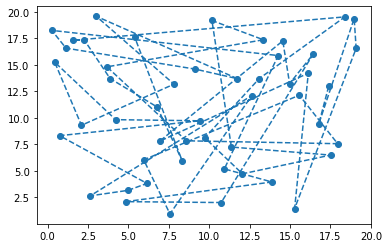

In [107]:
#Memetic with binary tournement selection
bintour_memetic_solution = genetic_algorithm_memetic(N, max_iters=200)

x, y = list(), list()
[x.append(coords_tsp[i][0]) for i in bintour_memetic_solution]
[y.append(coords_tsp[i][1]) for i in bintour_memetic_solution]
plt.plot(x, y, linestyle='dashed', marker='o')

Solution found of  [ 1  0  6 14  8  3 26 23 20 32 25 13  7  2  5 11  4  9 10 21 22 17 24 46
 42 44 37 48 49 45 38 30 41 47 43 40 18 15 16 12 19 27 39 35 31 28 29 33
 36 34] , best fitness is  213.17429854877153


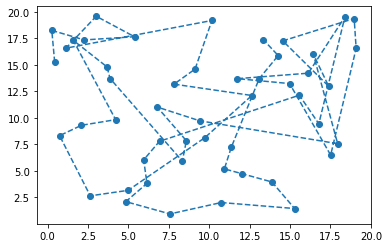

In [108]:
#Memetic with tournement selection (25)
tour_memetic_solution = genetic_algorithm_memetic(N, max_iters=200, tour_size = 25)

x, y = list(), list()
[x.append(coords_tsp[i][0]) for i in tour_memetic_solution]
[y.append(coords_tsp[i][1]) for i in tour_memetic_solution]
plt.plot(x, y, linestyle='dashed', marker='o')

Solution found of  [33 23 20 30 29 37 27 15  3 46 21 39 35 41 47 32 44 48  4 25 31 13 10 22
 38  1  8  0 14 36 42 26  6  5  9  7 19 12 18 11 28 24 16 40 49 34 45 43
  2 17] , best fitness is  384.15446349500905


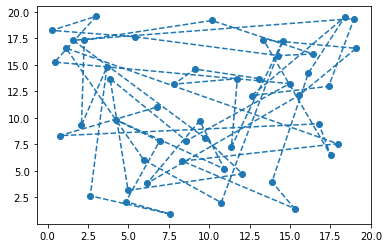

In [109]:
#Simple EA with binary tournement selection
bintour_EA_solution = genetic_algorithm_simpleEA(N, max_iters=200)

x, y = list(), list()
[x.append(coords_tsp[i][0]) for i in bintour_EA_solution]
[y.append(coords_tsp[i][1]) for i in bintour_EA_solution]
plt.plot(x, y, linestyle='dashed', marker='o')

Solution found of  [43 40 32 23 20 30 36 33 41 42 37 34 26 38 44 48 47 49 46 39 35 28 27 19
 24 17  9  1  3 14  6  0  4  8 10 11  2  5  7 12 15 13 16 18 25 22 21 29
 31 45] , best fitness is  172.40246572212624


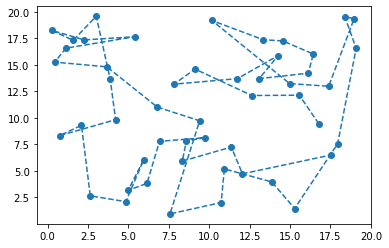

In [110]:
#Simple EA with tournement selection (25)
tour_EA_solution = genetic_algorithm_simpleEA(N, max_iters=200, tour_size=25)

x, y = list(), list()
[x.append(coords_tsp[i][0]) for i in tour_EA_solution]
[y.append(coords_tsp[i][1]) for i in tour_EA_solution]
plt.plot(x, y, linestyle='dashed', marker='o')

## Small instance of our choice
http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/index.html
,used berlin-52.tsp

In [111]:
#Small instance of our choice

x_len = 50
y_len = 2
N = 100

def read_txt_instance(txt):
    coords_city = np.empty((x_len,y_len))
    with open(txt, "r") as file_tsp:
        lines = file_tsp.readlines()
    n_lines = len(lines)
    for i in range(n_lines):
        line_i = lines[i].splitlines()
        coord_i = line_i[0].split()
        coord_i = coord_i[1:3]
        coords_city[i] = [float(j) for j in coord_i]
    return coords_city

berlin52_tsp = read_txt_instance("berlin52-tsp.txt")
txt = berlin52_tsp

Solution found of  [28 29  1  6 41 20 16 49 19 22 34 35 33  4 14 36 38  5 39 47 23 45 15 37
  3 24 11 27 26 25 46  0 48  2 17 30 31 21 18  7 44  9  8 40 43 42 32 10
 12 13] , best fitness is  10314.921982440683


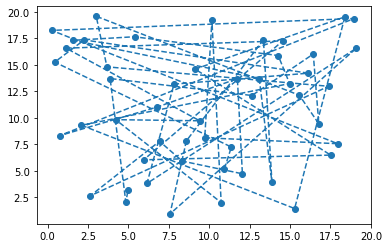

In [112]:
instance_simpleEA_solution = genetic_algorithm_simpleEA(N, max_iters=200, tour_size=15)

x, y = list(), list()
[x.append(coords_tsp[i][0]) for i in instance_simpleEA_solution]
[y.append(coords_tsp[i][1]) for i in instance_simpleEA_solution]
plt.plot(x, y, linestyle='dashed', marker='o')

Solution found of  [16  2 17 31 48 42 43 35  0 36 23 45 25 46  4  3 37  5 39 47 14 38 33 44
  9  8  7 40 18 20  1 41  6 29 28 15 19 49 34 30 21 22 24 11 27 26 12 13
 10 32] , best fitness is  10873.557556496004


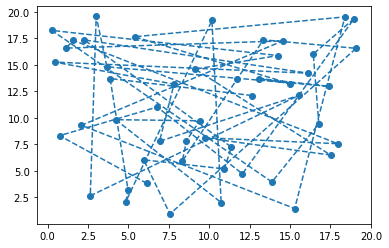

In [113]:
instance_memetic_solution = genetic_algorithm_memetic(N, max_iters=200, tour_size=15)

x, y = list(), list()
[x.append(coords_tsp[i][0]) for i in instance_memetic_solution]
[y.append(coords_tsp[i][1]) for i in instance_memetic_solution]
plt.plot(x, y, linestyle='dashed', marker='o')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a99332b8-5d3d-47fa-8230-1d208927ff84' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>